# Supervised Learning
#### Supervised learning is a machine learning algorithm that uses labelled data to TRAIN machine learning models.
#### LABELED DATA means that the output is already known to you. Labeled data is data that has some predefined tags such as name, type, or number. Labeled data is used in Supervised Learning techniques, whereas Unlabelled data is used in Unsupervised Learning.
#### The ML model just needs to map the inputs to the outputs.

### Commonly used supervised learning algorithms
#### Linear Regression, Logistic Regression, SVM, K Nearest Neighbors, Decision Tree, Random Forests, Gradient Boosting

#### Linear Regression, Random Forests, and Gradient Boosting were applied and evaluated in this notebook

### Approach
#### Supervised Learning takes labeled inouts and maps it to known output, which means the target variable is already known (in this notebook, target variable is Salary)
### Type of Problems
#### Classification and Regression problems
### Applications
#### Weather Prediction, Stock Price Analysis, Sales Forecast, Salary Prediction

### Training
#### Supervised learning techniques need external supervision train models

### Classification or Regression for Salary Prediction?
#### Since salary is a continuous variable, predicting it using a classification model such as KNN is not be the best choice. Instead, for predicting continuous variables like salary, we will consider using REGRESSION model such as Random Forest Regressor, Gradient Boosting Regressor and Linear Regression. 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = []
mae_values = []

## Supervised Learning on the Salary Dataset
### Model Data Selection

In [27]:
clean_data = "../data/Clean_Salary_Data.csv"
model_data = pd.read_csv(clean_data)
print(model_data.columns)
#Selecting The Prediction Target or response variable
y = model_data.Salary
### Choosing "Features" or predictors or predictor variables
features = ['Age', 'Years of Experience']
X = model_data[features]

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Age Group'],
      dtype='object')


## Linear Regression
#### Linear Regression is one of the simplest and most widely used algorithms for regression tasks. It assumes a linear relationship between the input features and the target variable. It fits a straight line that best represents the relationship and predicts the target based on this line. It's a good starting point for regression tasks when you want to understand the basic relationship between variables.
## Linear Regression with features = ['Age', 'Years of Experience']

In [28]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)
reg_model = LinearRegression()
reg_model.fit(train_X, train_y)

reg_pred= reg_model.predict(val_X)
reg_r2 = r2_score(val_y, reg_pred)
reg_mae = mean_absolute_error(val_y, reg_pred)
r2_scores.append(reg_r2)
mae_values.append(reg_mae)
print(f"R-squared Score: {reg_r2} (i.e) Linear Regeression Model Score: {reg_r2*100}%")
print("Mean Absolute Error: ", round(mean_absolute_error(val_y, reg_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(val_y, reg_pred, squared = False), 2))

R-squared Score: 0.7098435025632872 (i.e) Linear Regeression Model Score: 70.98435025632872%
Mean Absolute Error:  23036.13
Mean Squared Error:  28333.84


### R-squared Score: 0.7098 (i.e) Linear Regeression Model Score: 70.98%
### Mean Absolute Error:  23036.13  (i.e): on average, the model's predictions are about 23,036 dollars away from the actual salaries.
### Mean Squared Error:  28333.84

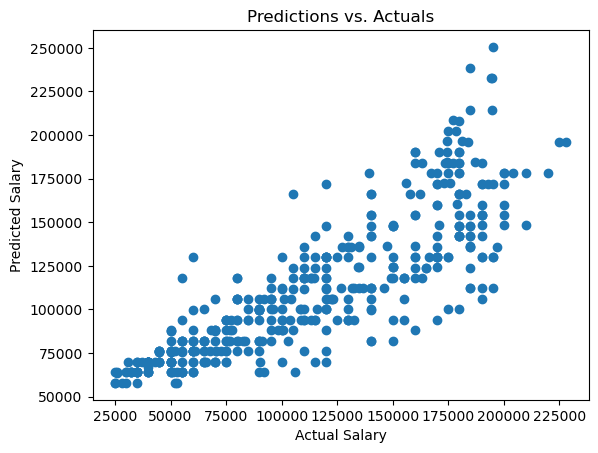

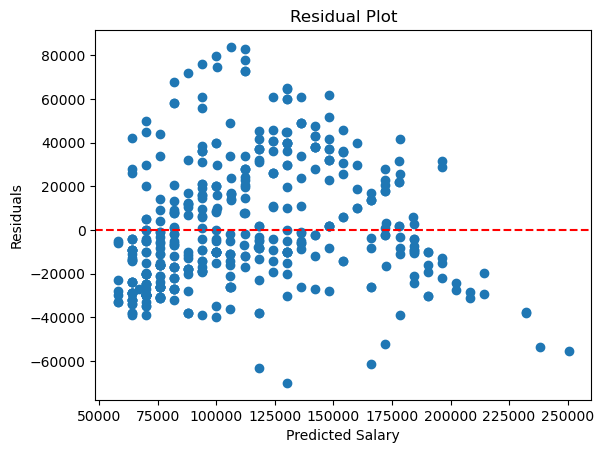

In [29]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actuals
plt.scatter(val_y, reg_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predictions vs. Actuals")
plt.show()

# Create a residual plot
residuals = val_y - reg_pred
plt.scatter(reg_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#### the residual plot helps you see if your guesses (predictions) are close to the real answers. It's like a map that tells you if you're doing a good job or if you need to improve your guessing

## Linear Regression  with all features (numerical variables one-hot encoded)

In [30]:
X = model_data.drop(["Salary", "Age Group", "Unnamed: 0"], axis=1).copy()


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label encoding for ordinal
# onehot for nominal

onehot_encoder = OneHotEncoder(drop="first", sparse=False)
onehot_encoded = onehot_encoder.fit_transform(X[["Gender", "Job Title", "Education Level"]])
# Create a DataFrame from the one-hot encoded array
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Gender", "Job Title", "Education Level"]))
# Concatenate the one-hot encoded DataFrame with the rest of the features
X = pd.concat([X, onehot_df], axis=1)
# Drop the original "Gender" and "Job Title" columns
X = X.drop(["Gender", "Job Title", "Education Level"], axis=1)


c:\Users\olami\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)
reg_model = LinearRegression()
reg_model.fit(train_X, train_y)

reg_pred= reg_model.predict(val_X)
score = r2_score(val_y, reg_pred)
print(f"R-squared Score: {score} (i.e) Linear Regeression Model Score: {score*100}%")
print("Mean Absolute Error: ", round(mean_absolute_error(val_y, reg_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(val_y, reg_pred, squared = False), 2))

R-squared Score: -5.461906543177935e+20 (i.e) Linear Regeression Model Score: -5.4619065431779355e+22%
Mean Absolute Error:  71628364803036.42
Mean Squared Error:  1229309993176310.5


### R-squared Score: -5.461906543177935e+20 (i.e) Linear Regeression Model Score (with one hot encoded features): terrible prediction
### Mean Absolute Error:  23036.13  (i.e): on average, the model's predictions are about 7 trillion dollars away from the actual salaries.

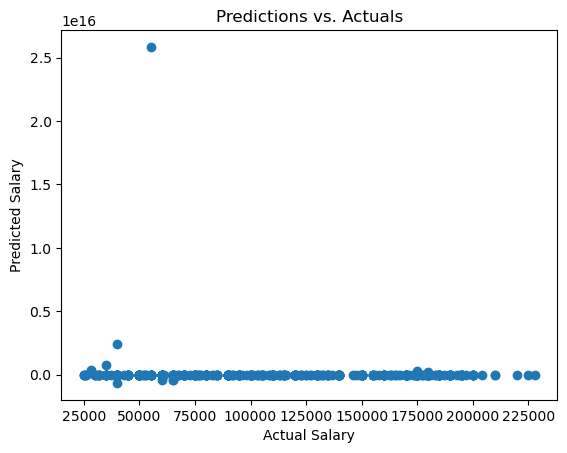

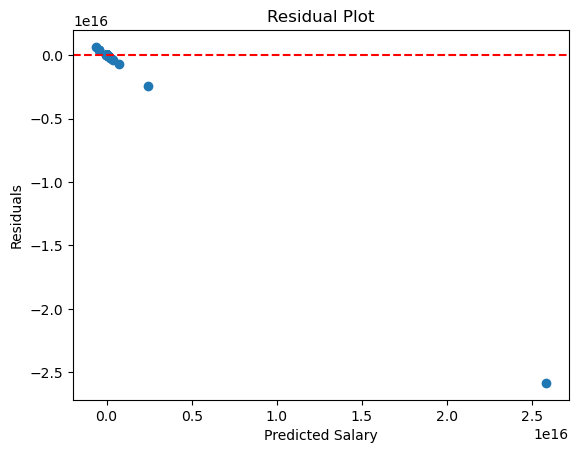

In [32]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actuals
plt.scatter(val_y, reg_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predictions vs. Actuals")
plt.show()

# Create a residual plot
residuals = val_y - reg_pred
plt.scatter(reg_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Random Forests Regression
#### Random Forest Regression is an ensemble algorithm that combines multiple decision trees to make predictions. Each tree is built using a subset of the data and a random subset of features. The final prediction is an average of predictions from individual trees. Random forests are powerful because they can capture complex relationships in the data and are less prone to overfitting. They are well-suited for tasks where linear relationships might not be sufficient.

In [33]:
X = model_data.drop(["Salary", "Age Group", "Unnamed: 0"], axis=1).copy()


## Preprocessing

###### preprocessing is a crucial step in preparing your data for machine learning models. In this case, you have categorical variables like "Gender," "Education Level," and "Job Title" that need to be transformed into a numerical format that the Random Forest model can understand

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label encoding for ordinal
# onehot for nominal
label_encoder = LabelEncoder()
X["Education Level"] = label_encoder.fit_transform(X["Education Level"])

onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(X[["Gender", "Job Title"]])
# Create a DataFrame from the one-hot encoded array
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Gender", "Job Title"]))
# Concatenate the one-hot encoded DataFrame with the rest of the features
X = pd.concat([X, onehot_df], axis=1)
# Drop the original "Gender" and "Job Title" columns
X = X.drop(["Gender", "Job Title"], axis=1)


In [35]:
X

,Age,Education Level,Years of Experience,Gender_Male,Gender_Other,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,3,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,2,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,43.0,2,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1783,27.0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1784,33.0,0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1785,37.0,0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_pred = rf_model.predict(val_X)

# Calculate Mean Absolute Error (MAE) and R-squared score
rf_mae = mean_absolute_error(val_y, rf_pred)
rf_r2 = r2_score(val_y, rf_pred)
r2_scores.append(rf_r2)
mae_values.append(rf_mae)

# Print the evaluation metrics
print("Mean Absolute Error:", rf_mae)
print("R-squared Score:", rf_r2)

Mean Absolute Error: 10311.344490572066
R-squared Score: 0.9054351249292889


In [37]:
import pyperclip
print(rf_model.predict(val_X.head(1)))
print(val_X.head(1))
# pyperclip.copy(str(val_X.head(1)))
val_X.head(1)

[98002.56]
       Age  Education Level  Years of Experience  Gender_Male  Gender_Other  \
1582  31.0                0                  6.0          1.0           0.0   

      Job Title_Accountant  Job Title_Administrative Assistant  \
1582                   0.0                                 0.0   

      Job Title_Back end Developer  Job Title_Business Analyst  \
1582                           0.0                         0.0   

      Job Title_Business Development Manager  ...  \
1582                                     0.0  ...   

      Job Title_Supply Chain Manager  Job Title_Technical Recruiter  \
1582                             0.0                            0.0   

      Job Title_Technical Support Specialist  Job Title_Technical Writer  \
1582                                     0.0                         0.0   

      Job Title_Training Specialist  Job Title_UX Designer  \
1582                            0.0                    0.0   

      Job Title_UX Researcher  Job T

,Age,Education Level,Years of Experience,Gender_Male,Gender_Other,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
1582,31.0,0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### R-squared Score: 0.9054 (i.e) Random Forests Model Score: 90.54%
### Mean Absolute Error:  10311.11  (i.e): on average, the model's predictions are about 10,311 dollars away from the actual salaries.
## This has an accuracy that is extremely higher than the Linear Regression Model.

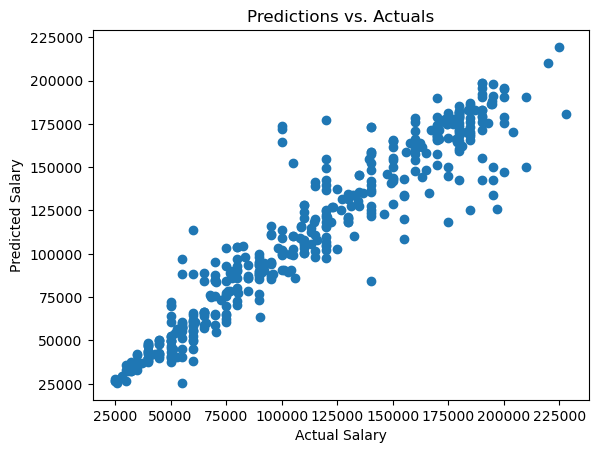

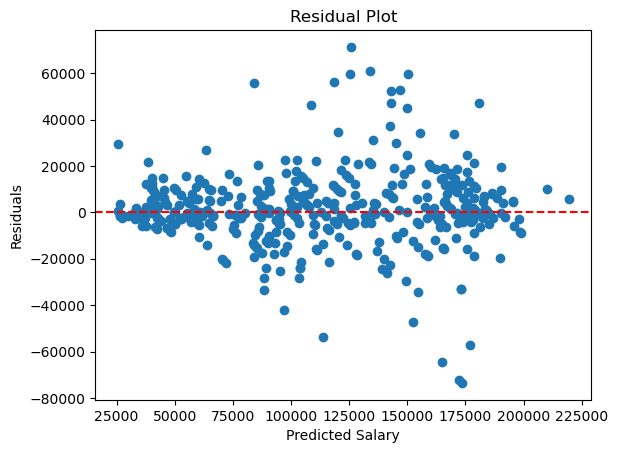

In [38]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actuals
plt.scatter(val_y, rf_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predictions vs. Actuals")
plt.show()

# Create a residual plot
residuals = val_y - rf_pred
plt.scatter(rf_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### There is a strong positive correlation between the predicted and actual salaries.
#### If the points align closely to a 45-degree line (y=x), it indicates accurate predictions. It does!
#### the residual plot helps you see if your guesses (predictions) are close to the real answers. It's like a map that tells you if you're doing a good job or if you need to improve your guessing

## Gradient Boosting
#### Gradient Boosting is another ensemble algorithm that builds decision trees sequentially. Each tree is built to correct the errors made by the previous one. This approach creates a strong predictive model. Gradient Boosting is particularly effective for capturing complex relationships in the data and tends to perform well even with less data preprocessing. It's often used when high prediction accuracy is desired.

In [39]:
X = model_data.drop(["Salary", "Age Group", "Unnamed: 0"], axis=1).copy()

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label encoding for ordinal
# onehot for nominal
label_encoder = LabelEncoder()
X["Education Level"] = label_encoder.fit_transform(X["Education Level"])

onehot_encoder = OneHotEncoder(drop="first", sparse=False)
onehot_encoded = onehot_encoder.fit_transform(X[["Gender", "Job Title"]])
# Create a DataFrame from the one-hot encoded array
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Gender", "Job Title"]))
# Concatenate the one-hot encoded DataFrame with the rest of the features
X = pd.concat([X, onehot_df], axis=1)
# Drop the original "Gender" and "Job Title" columns
X = X.drop(["Gender", "Job Title"], axis=1)


c:\Users\olami\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(train_X, train_y)
gb_pred = gb_model.predict(val_X)

# Calculate Mean Absolute Error (MAE) and R-squared score
gb_mae = mean_absolute_error(val_y, gb_pred)
gb_r2 = r2_score(val_y, gb_pred)
r2_scores.append(gb_r2)
mae_values.append(gb_mae)

# Print the evaluation metrics
print("Mean Absolute Error:", gb_mae)
print("R-squared Score:", gb_r2)

Mean Absolute Error: 13742.306151493096
R-squared Score: 0.8705891599741382


### R-squared Score: 0.8706 (i.e) Random Forests Model Score: 87.06%
### Mean Absolute Error:  13742.31  (i.e): on average, the model's predictions are about 13,742 dollars away from the actual salaries.
## This also has an accuracy that is higher than the Linear Regression Model, but 3% less than the Random Forests Model.

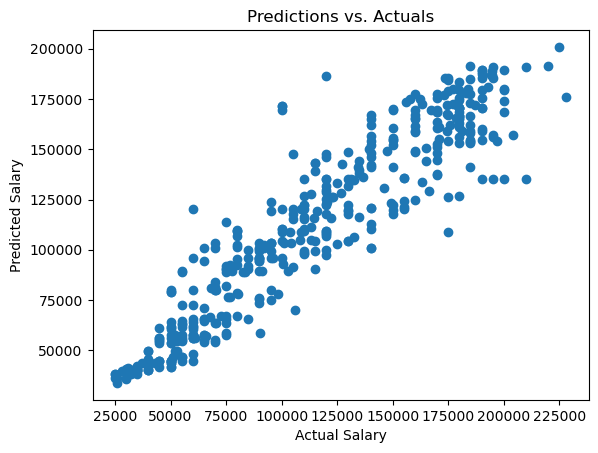

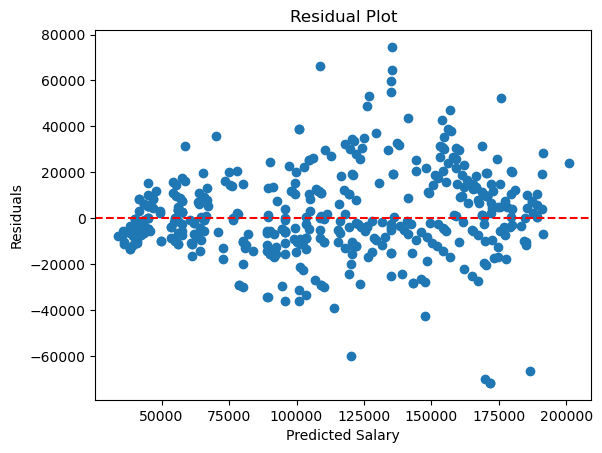

In [42]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actuals
plt.scatter(val_y, gb_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predictions vs. Actuals")
plt.show()

# Create a residual plot
residuals = val_y - gb_pred
plt.scatter(gb_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### There is a strong positive correlation between the predicted and actual salaries.
#### If the points align closely to a 45-degree line (y=x), it indicates accurate predictions. It does!
#### the residual plot helps you see if your guesses (predictions) are close to the real answers. It's like a map that tells you if you're doing a good job or if you need to improve your guessing

## Saving the models

In [43]:
import joblib

# save in current working dir
gb_model_name = "../models/gradient_boosting_model.pkl"
joblib.dump(gb_model, gb_model_name)

rf_model_name = "../models/random_forests_model.pkl"
joblib.dump(rf_model, rf_model_name)


['../models/random_forests_model.pkl']

# Conclusion

In [44]:
comparison_df = pd.DataFrame({
    'Model': model_names,
    'R-squared Score': r2_scores,
    'Mean Absolute Error': mae_values
})
comparison_df

,Model,R-squared Score,Mean Absolute Error
0,Linear Regression,0.709844,23036.127102
1,Random Forest,0.905435,10311.344491
2,Gradient Boosting,0.870589,13742.306151


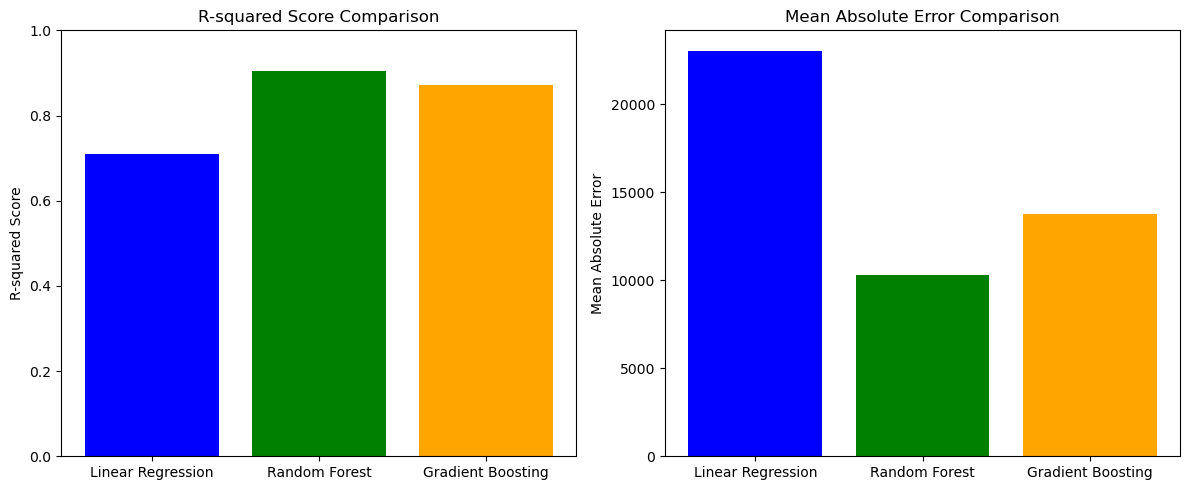

In [45]:
import matplotlib.pyplot as plt

# Create subplots for R-squared score and MAE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot R-squared scores
axes[0].bar(comparison_df['Model'], comparison_df['R-squared Score'], color=['blue', 'green', 'orange'])
axes[0].set_title('R-squared Score Comparison')
axes[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axes[0].set_ylabel('R-squared Score')

# Plot MAE values
axes[1].bar(comparison_df['Model'], comparison_df['Mean Absolute Error'], color=['blue', 'green', 'orange'])
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].set_ylabel('Mean Absolute Error')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Most Accurate Model: Random Forests with R-Squared of 0.9
## Least Accurate Model: Linear Regression with R-Squared of 0.7
## Gradient Boosting: with R-Squared of 0.87 

### More inferences can be made from Mean Absolute Error

#### Note: The linear regression model was only trained with 2 features (Age & Years of Experience). In contrast, the other models were trained on all features.

#### Check <i>input_predict.ipynb</i> to make predictions. Random Forests Regression model giving the highest accuracy will be used.
<hr>